In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [17]:
data_dir = '/content/drive/MyDrive/PlantDisease/Data'
categories = os.listdir(data_dir)

# load images and lables
images = []
lables = []

for category in categories:
  print(category)
  folder_path = os.path.join(data_dir, category)
  for img_file in os.listdir(folder_path):
      img_path = os.path.join(folder_path, img_file)
      img = cv2.imread(img_path)
      if img is not None:
          img = cv2.resize(img, (64,64))
          images.append(img)
          lables.append(category)
   #convert image and lables to numpy arrays
images = np.array(images)

Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_virus
Tomato___Target_Spot
Tomato___Late_blight
Tomato___healthy
Tomato___Early_blight
Tomato___Bacterial_spot


In [18]:
# convert to numpy arrays
x= np.array(images)
y= np.array(lables)

print("Labels:",np.unique(y))
print("Data Shape:",x.shape)

Labels: ['Tomato___Bacterial_spot' 'Tomato___Early_blight' 'Tomato___Late_blight'
 'Tomato___Target_Spot' 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
 'Tomato___Tomato_mosaic_virus' 'Tomato___healthy']
Data Shape: (12993, 64, 64, 3)


Class_Distribution:
Tomato___Tomato_Yellow_Leaf_Curl_Virus    1961
Tomato___healthy                          1926
Tomato___Early_blight                     1920
Tomato___Late_blight                      1851
Tomato___Target_Spot                      1827
Tomato___Tomato_mosaic_virus              1806
Tomato___Bacterial_spot                   1702
Name: count, dtype: int64


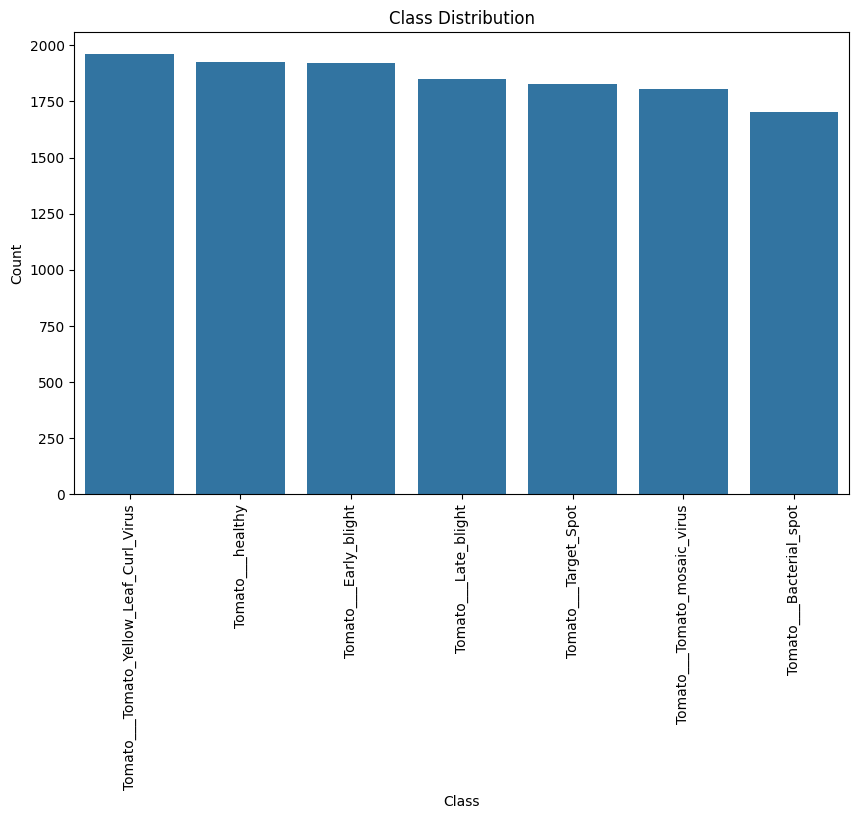

In [20]:
class_counts = pd.Series(y).value_counts()
print("Class_Distribution:")
print(class_counts)

#plot class distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

In [21]:
# remove corrupted images()
valid_images =[]
valid_lables =[]

for img, label in zip(x,y):
  if img.shape == (64,64,3):
    valid_images.append(img)
    valid_lables.append(label)

x=np.array(valid_images)
y=np.array(valid_lables)

print("Cleaned Data Shape:",x.shape)

Cleaned Data Shape: (12993, 64, 64, 3)


In [22]:
#encode lables
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#save class names for later use
class_names = le.classes_
class_names

array(['Tomato___Bacterial_spot', 'Tomato___Early_blight',
       'Tomato___Late_blight', 'Tomato___Target_Spot',
       'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
       'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'], dtype='<U38')

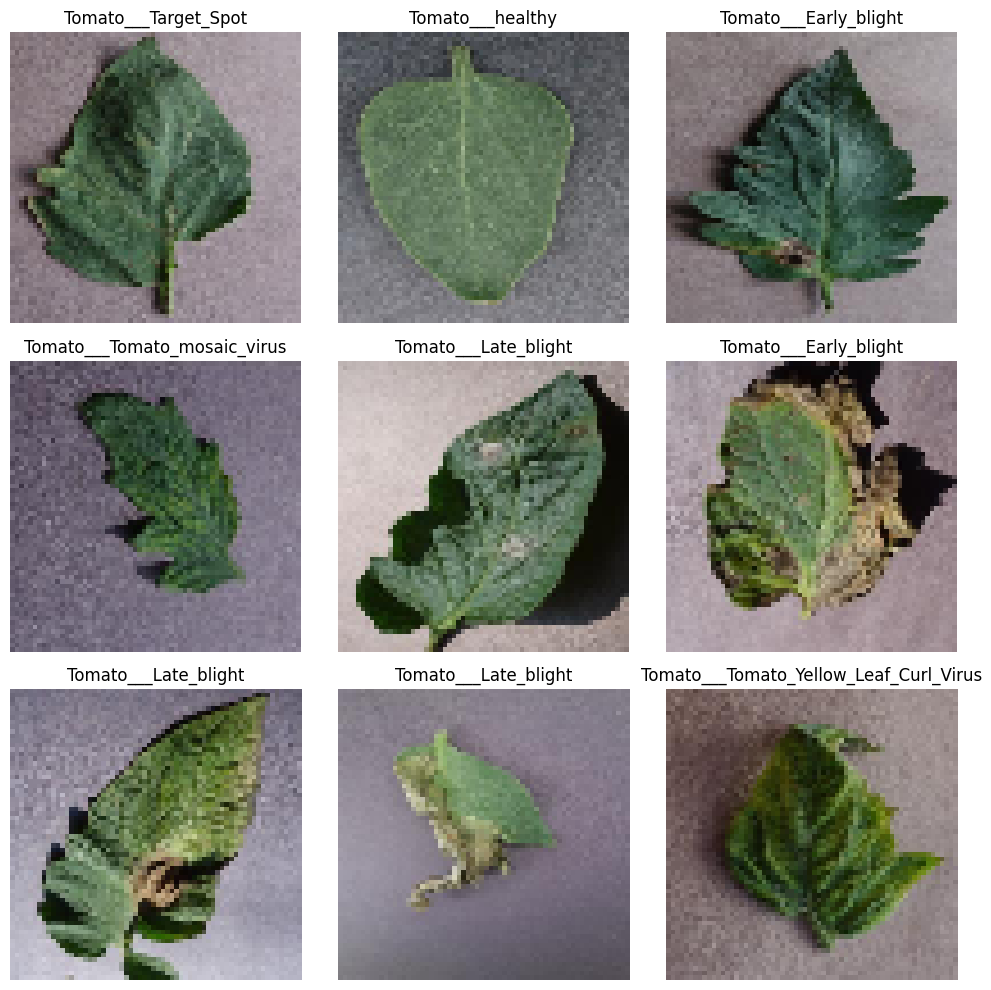

In [23]:
import random

plt.figure(figsize=(10,10))
for i in range(9):
  idx = random.randint(0,len(x))
  plt.subplot(3,3,i+1)
  plt.imshow(cv2.cvtColor(x[idx], cv2.COLOR_BGR2RGB))
  plt.title(class_names[y_encoded[idx]])
  plt.axis("off")
plt.tight_layout()
plt.show()

In [26]:
def extract_color_histogram(image, bins=(8,8,8)):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  hist = cv2.calcHist([image], [0,1,2], None, bins, [0,256,0,256,0,256])
  hist=cv2.normalize(hist, hist).flatten()
  return hist

hist_features = [extract_color_histogram(img) for img in x]
x_features = np.array(hist_features)

In [27]:
x_features.shape

(12993, 512)

In [28]:
#choose model
model = SVC(kernel='linear', C=10,gamma='scale' )

In [29]:
#train/test split
x_train, x_test, y_train, y_test = train_test_split(x_features, y_encoded, test_size=0.2, random_state=42)

#train model
model.fit(x_train, y_train)

#Predict
y_pred = model.predict(x_test)

Accuracy: 0.9430550211619854
F1 Score: 0.9427317412741102


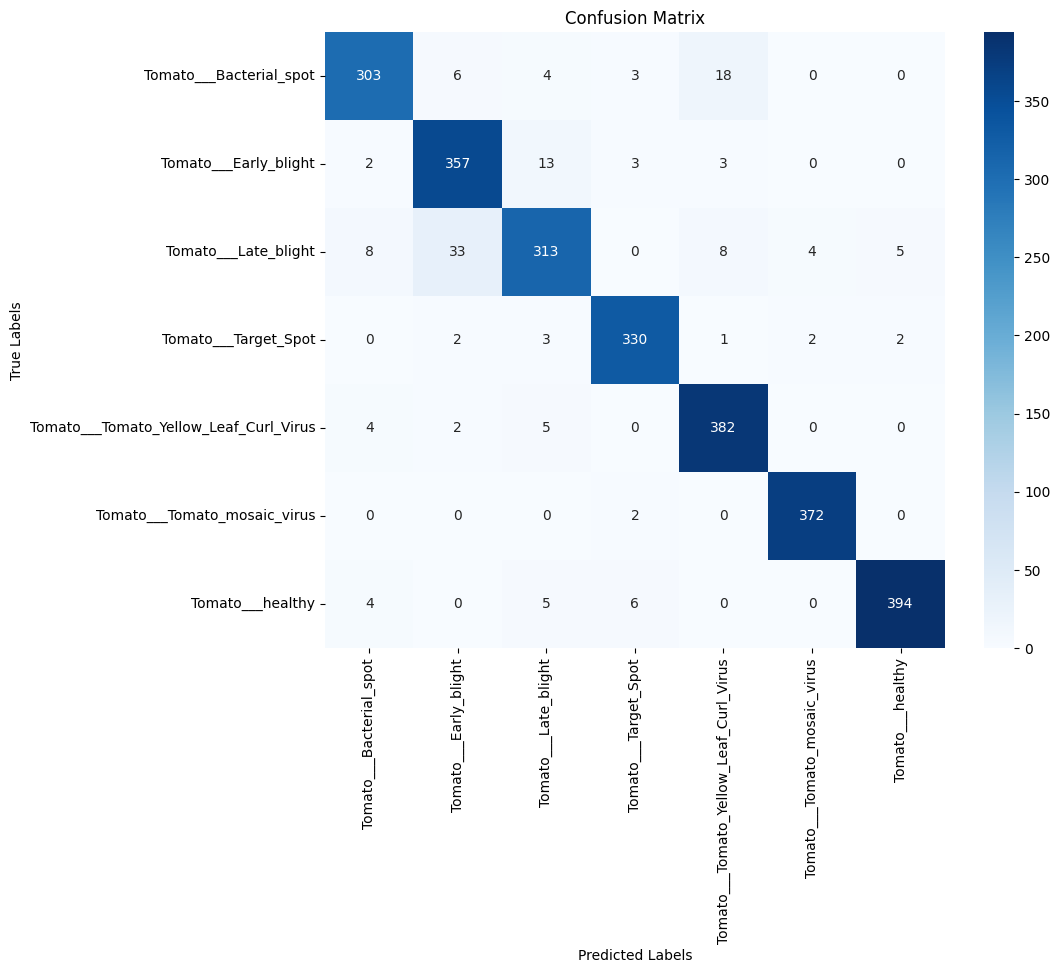

In [33]:
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix,classification_report

#accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

#f1 score
f1=f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)

#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



In [34]:
#classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

Classification Report:
                                        precision    recall  f1-score   support

               Tomato___Bacterial_spot       0.94      0.91      0.93       334
                 Tomato___Early_blight       0.89      0.94      0.92       378
                  Tomato___Late_blight       0.91      0.84      0.88       371
                  Tomato___Target_Spot       0.96      0.97      0.96       340
Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.93      0.97      0.95       393
          Tomato___Tomato_mosaic_virus       0.98      0.99      0.99       374
                      Tomato___healthy       0.98      0.96      0.97       409

                              accuracy                           0.94      2599
                             macro avg       0.94      0.94      0.94      2599
                          weighted avg       0.94      0.94      0.94      2599

